# Import libraries 

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=a01a0d71950f380d3edfd1afdc1aa66ecc3676bcfe3f6598a9bed17645061a3b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [4]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras.utils.vis_utils import plot_model

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [6]:
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

%matplotlib inline

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

# Loading Data

In [8]:
from google.colab import files
files.upload()

Saving EUR_USD.csv to EUR_USD.csv


{'EUR_USD.csv': b'\xef\xbb\xbfDate,Close,Open,High,Low,Change\r\n27-Dec-79,1.5074,1.5074,1.5074,1.5074,0.41%\r\n28-Dec-79,1.5076,1.5076,1.5076,1.5076,0.01%\r\n31-Dec-79,1.5081,1.5081,1.5081,1.5081,0.03%\r\n2-Jan-80,1.5149,1.5149,1.5149,1.5149,0.45%\r\n3-Jan-80,1.5177,1.5177,1.5177,1.5177,0.18%\r\n4-Jan-80,1.5129,1.5129,1.5129,1.5129,-0.32%\r\n7-Jan-80,1.5168,1.5168,1.5168,1.5168,0.26%\r\n8-Jan-80,1.5108,1.5108,1.5108,1.5108,-0.40%\r\n9-Jan-80,1.5161,1.5161,1.5161,1.5161,0.35%\r\n10-Jan-80,1.5133,1.5133,1.5133,1.5133,-0.18%\r\n11-Jan-80,1.5108,1.5108,1.5108,1.5108,-0.17%\r\n14-Jan-80,1.511,1.511,1.511,1.511,0.01%\r\n15-Jan-80,1.5047,1.5047,1.5047,1.5047,-0.42%\r\n16-Jan-80,1.5074,1.5074,1.5074,1.5074,0.18%\r\n17-Jan-80,1.5074,1.5074,1.5074,1.5074,0.00%\r\n18-Jan-80,1.5083,1.5083,1.5083,1.5083,0.06%\r\n21-Jan-80,1.5053,1.5053,1.5053,1.5053,-0.20%\r\n22-Jan-80,1.5006,1.5006,1.5006,1.5006,-0.31%\r\n23-Jan-80,1.5035,1.5035,1.5035,1.5035,0.19%\r\n24-Jan-80,1.5026,1.5026,1.5026,1.5026,-0.06%\

In [76]:
data = pd.read_csv('EUR_USD.csv')

In [77]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['SMA']= ta.sma(data.Close, length=10)
data['EMA']= ta.ema(data.Close, length= 10)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

macd = data.ta.macd(fast =12, slow =26, signal =9)
BB = data.ta.bbands(length=12, std =2)
ADX = data.ta.adx(length = 20)
ROC = data.ta.roc(length = 12)

data = pd.concat([data, macd, BB, ADX, ROC], axis = 1)

In [78]:
data.head()

,Date,Close,Open,High,Low,Change,RSI,SMA,EMA,EMAF,...,MACDs_12_26_9,BBL_12_2.0,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12
0,27-Dec-79,1.5074,1.5074,1.5074,1.5074,0.41%,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28-Dec-79,1.5076,1.5076,1.5076,1.5076,0.01%,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31-Dec-79,1.5081,1.5081,1.5081,1.5081,0.03%,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2-Jan-80,1.5149,1.5149,1.5149,1.5149,0.45%,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3-Jan-80,1.5177,1.5177,1.5177,1.5177,0.18%,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data['returns'] = (data['Close']/data['Close'].shift(1)) -1
data['returnsclass'] = [1 if data.returns[i]>0 else 0 for i in range(len(data))]

In [80]:
data.dropna(inplace=True)

In [81]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data

,Date,Close,Open,High,Low,Change,RSI,SMA,EMA,EMAF,...,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12,returns,returnsclass
149,1980-07-30,1.4697,1.4697,1.4697,1.4697,-0.74%,39.157425,1.48821,1.485441,1.484946,...,1.487917,1.501634,1.843865,-0.163989,22.114312,44.215670,55.784330,-1.263016,-0.007362,0
150,1980-07-31,1.4605,1.4605,1.4605,1.4605,-0.63%,33.797186,1.48498,1.480906,1.482618,...,1.485858,1.506336,2.756303,-0.119179,22.057060,39.514678,60.485322,-1.663076,-0.006260,0
151,1980-08-01,1.4531,1.4531,1.4531,1.4531,-0.51%,30.230811,1.48179,1.475850,1.479807,...,1.482975,1.510226,3.675239,-0.048136,22.329382,36.251371,63.748629,-2.325738,-0.005067,0
152,1980-08-04,1.4575,1.4575,1.4575,1.4575,0.30%,34.625603,1.47858,1.472514,1.477682,...,1.480033,1.509903,4.036302,0.122801,22.274401,39.384515,60.615485,-2.364684,0.003028,1
153,1980-08-05,1.4643,1.4643,1.4643,1.4643,0.47%,40.800273,1.47573,1.471021,1.476408,...,1.478308,1.509204,4.179913,0.273299,21.772944,43.872180,56.127820,-1.393939,0.004666,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,2021-09-22,1.1686,1.1726,1.1757,1.1683,-0.32%,33.802243,1.17687,1.175421,1.177435,...,1.177825,1.187589,1.657900,0.027581,14.754867,16.865059,26.393418,-1.533536,-0.003156,0
10825,2021-09-23,1.1736,1.1686,1.1751,1.1683,0.43%,43.248043,1.17598,1.175090,1.177070,...,1.176967,1.186242,1.576115,0.318512,15.118452,15.758571,24.661790,-0.870006,0.004279,1
10826,2021-09-24,1.1714,1.1738,1.1748,1.1700,-0.19%,40.522179,1.17498,1.174419,1.176530,...,1.176142,1.185489,1.589525,0.246368,15.463858,15.026062,23.515432,-0.838060,-0.001875,0
10827,2021-09-26,1.1723,1.1724,1.1728,1.1716,0.08%,42.121150,1.17413,1.174034,1.176127,...,1.175292,1.184005,1.482826,0.328337,15.791994,14.814640,23.184561,-0.862579,0.000768,1


In [82]:
data_set = data.set_index(['Date'])
data_set

,Close,Open,High,Low,Change,RSI,SMA,EMA,EMAF,EMAM,...,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12,returns,returnsclass
Date,,,,,,,,,,,,,,,,,,,,,
1980-07-30,1.4697,1.4697,1.4697,1.4697,-0.74%,39.157425,1.48821,1.485441,1.484946,1.470030,...,1.487917,1.501634,1.843865,-0.163989,22.114312,44.215670,55.784330,-1.263016,-0.007362,0
1980-07-31,1.4605,1.4605,1.4605,1.4605,-0.63%,33.797186,1.48498,1.480906,1.482618,1.469841,...,1.485858,1.506336,2.756303,-0.119179,22.057060,39.514678,60.485322,-1.663076,-0.006260,0
1980-08-01,1.4531,1.4531,1.4531,1.4531,-0.51%,30.230811,1.48179,1.475850,1.479807,1.469509,...,1.482975,1.510226,3.675239,-0.048136,22.329382,36.251371,63.748629,-2.325738,-0.005067,0
1980-08-04,1.4575,1.4575,1.4575,1.4575,0.30%,34.625603,1.47858,1.472514,1.477682,1.469272,...,1.480033,1.509903,4.036302,0.122801,22.274401,39.384515,60.615485,-2.364684,0.003028,1
1980-08-05,1.4643,1.4643,1.4643,1.4643,0.47%,40.800273,1.47573,1.471021,1.476408,1.469173,...,1.478308,1.509204,4.179913,0.273299,21.772944,43.872180,56.127820,-1.393939,0.004666,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-22,1.1686,1.1726,1.1757,1.1683,-0.32%,33.802243,1.17687,1.175421,1.177435,1.186251,...,1.177825,1.187589,1.657900,0.027581,14.754867,16.865059,26.393418,-1.533536,-0.003156,0
2021-09-23,1.1736,1.1686,1.1751,1.1683,0.43%,43.248043,1.17598,1.175090,1.177070,1.186000,...,1.176967,1.186242,1.576115,0.318512,15.118452,15.758571,24.661790,-0.870006,0.004279,1
2021-09-24,1.1714,1.1738,1.1748,1.1700,-0.19%,40.522179,1.17498,1.174419,1.176530,1.185711,...,1.176142,1.185489,1.589525,0.246368,15.463858,15.026062,23.515432,-0.838060,-0.001875,0


In [83]:
data_set = data_set.iloc[:, ]#.values
data_set.head(5)

,Close,Open,High,Low,Change,RSI,SMA,EMA,EMAF,EMAM,...,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12,returns,returnsclass
Date,,,,,,,,,,,,,,,,,,,,,
1980-07-30,1.4697,1.4697,1.4697,1.4697,-0.74%,39.157425,1.48821,1.485441,1.484946,1.470030,...,1.487917,1.501634,1.843865,-0.163989,22.114312,44.215670,55.784330,-1.263016,-0.007362,0
1980-07-31,1.4605,1.4605,1.4605,1.4605,-0.63%,33.797186,1.48498,1.480906,1.482618,1.469841,...,1.485858,1.506336,2.756303,-0.119179,22.057060,39.514678,60.485322,-1.663076,-0.006260,0
1980-08-01,1.4531,1.4531,1.4531,1.4531,-0.51%,30.230811,1.48179,1.475850,1.479807,1.469509,...,1.482975,1.510226,3.675239,-0.048136,22.329382,36.251371,63.748629,-2.325738,-0.005067,0
1980-08-04,1.4575,1.4575,1.4575,1.4575,0.30%,34.625603,1.47858,1.472514,1.477682,1.469272,...,1.480033,1.509903,4.036302,0.122801,22.274401,39.384515,60.615485,-2.364684,0.003028,1
1980-08-05,1.4643,1.4643,1.4643,1.4643,0.47%,40.800273,1.47573,1.471021,1.476408,1.469173,...,1.478308,1.509204,4.179913,0.273299,21.772944,43.872180,56.127820,-1.393939,0.004666,1


In [84]:
data_set.drop(['Change', 'returns'], axis=1, inplace=True)

In [85]:
data_set.shape

(10680, 23)

In [95]:
# Separate the features (historical prices and technical indicators) and the target (movement)
features = data_set.iloc[:, :-1]
target = data_set['returnsclass'].values

# Stacked LSTM

## Data Preparation for LSTM 

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

In [97]:
scaled_features.shape

(10680, 22)

In [98]:
scaled_target.shape

(10680, 1)

In [99]:
# Reshape the input data for LSTM (samples, time steps, features)
lookback = 14  # Number of previous time steps to consider
num_features = 22
num_samples = scaled_features.shape[0]

In [100]:
num_sequences = num_samples - lookback + 1

In [101]:
num_sequences

10667

In [102]:
X = np.zeros((num_sequences, lookback, num_features))

for i in range(num_sequences):
    X[i] = scaled_features[i : i + lookback]
print(X.shape)

(10667, 14, 22)


In [103]:
y = scaled_target[lookback-1:lookback-1+num_sequences]
y = np.reshape(y, (y.shape[0], 1))
print(y.shape)

(10667, 1)


In [104]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
X_train.shape

(8533, 14, 22)

In [106]:
y_train.shape

(8533, 1)

## Model

In [110]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 14, 50)            14600     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [111]:
# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Epoch 1/10
214/214 [==============================] - 15s 38ms/step - loss: 0.6947 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 2/10
214/214 [==============================] - 6s 30ms/step - loss: 0.6934 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.5044
Epoch 3/10
214/214 [==============================] - 7s 32ms/step - loss: 0.6934 - accuracy: 0.5042 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 4/10
214/214 [==============================] - 6s 29ms/step - loss: 0.6936 - accuracy: 0.4940 - val_loss: 0.6934 - val_accuracy: 0.4956
Epoch 5/10
214/214 [==============================] - 7s 33ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6934 - val_accuracy: 0.4956
Epoch 6/10
214/214 [==============================] - 6s 27ms/step - loss: 0.6934 - accuracy: 0.5067 - val_loss: 0.6930 - val_accuracy: 0.4962
Epoch 7/10
214/214 [==============================] - 7s 32ms/step - loss: 0.6931 - accuracy: 0.5010 - val_loss: 0.6927 - val_accuracy: 0.498

In [112]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

67/67 [==============================] - 1s 12ms/step - loss: 0.1546 - accuracy: 0.9396
Test Loss: 0.1546115279197693
Test Accuracy: 0.9395501613616943


In [113]:
predictions = model.predict(X_test)

67/67 [==============================] - 2s 8ms/step


In [114]:
threshold = 0.5  # Threshold to convert probabilities to binary labels

incorrect_predictions = []

# Convert predicted probabilities to binary labels
binary_predictions = np.where(predictions > threshold, 1, 0)

for true_label, predicted_label in zip(y_test, binary_predictions):
    if true_label != predicted_label:
        incorrect_predictions.append((true_label, predicted_label))

incorrect_predictions_count = len(incorrect_predictions)
print(f"Number of Incorrect Predictions: {incorrect_predictions_count}")

Number of Incorrect Predictions: 129


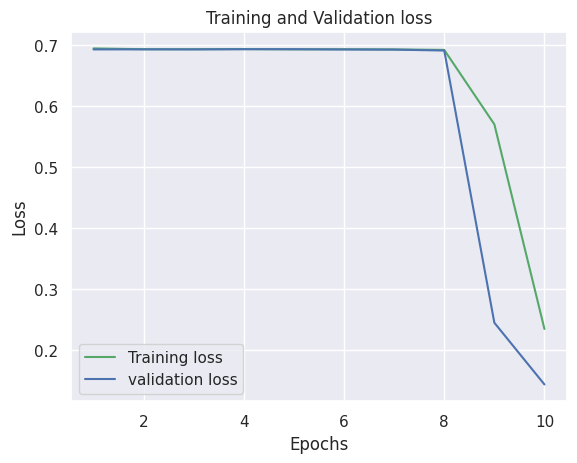

In [115]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

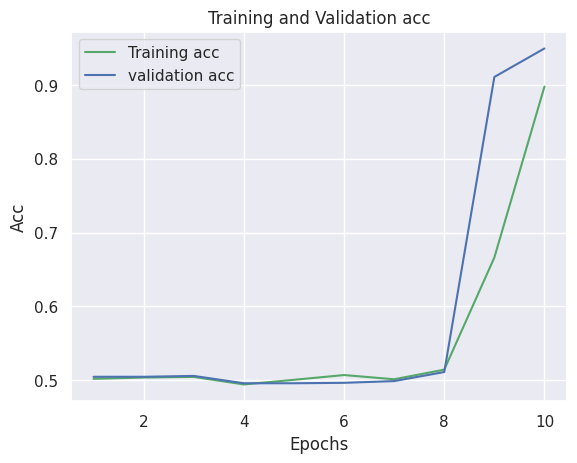

In [116]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predicted probabilities to binary labels
binary_predictions = np.where(predictions > threshold, 1, 0)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1102
         1.0       0.96      0.91      0.94      1032

    accuracy                           0.94      2134
   macro avg       0.94      0.94      0.94      2134
weighted avg       0.94      0.94      0.94      2134

Confusion Matrix:
[[1062   40]
 [  89  943]]
